# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
# checking for null values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Categorical Features
- Sex
- Smoker
- Region

In [6]:
# converting categorical features to numerical values

num_data={ 'sex':{'male':0,'female':1},
           'smoker':{'no':0,'yes':1},
           'region':{'northeast':0,'northwest':1,'southeast':2,'southwest':3}
         }

In [7]:
data=df.copy()
data.replace(num_data,inplace=True)

In [8]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [9]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


## Exploratory Data Analysis 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


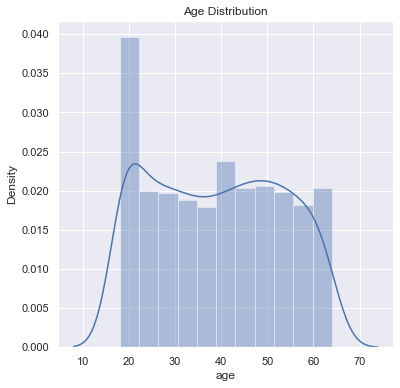

In [10]:
# Distribution of Age Value

sns.set()
plt.figure(figsize=(6,6))
plt.title('Age Distribution')
sns.distplot(data['age'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


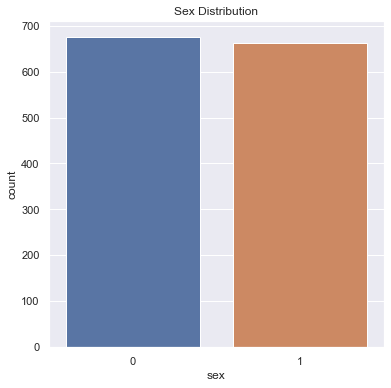

In [11]:
# Distribution of Sex

plt.figure(figsize=(6,6))
plt.title('Sex Distribution')
sns.countplot(data['sex'])
plt.show()

In [12]:
data['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

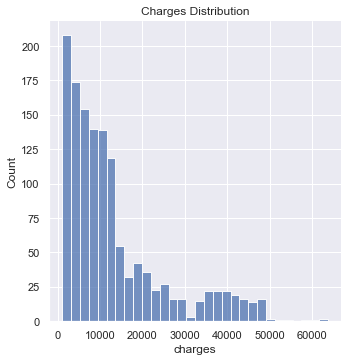

In [13]:
# Distribution of Charges

plt.figure(figsize=(6,6))
sns.displot(data['charges'])
plt.title('Charges Distribution')
plt.show()

<AxesSubplot:title={'center':'Age vs Charge'}, xlabel='age', ylabel='charges'>

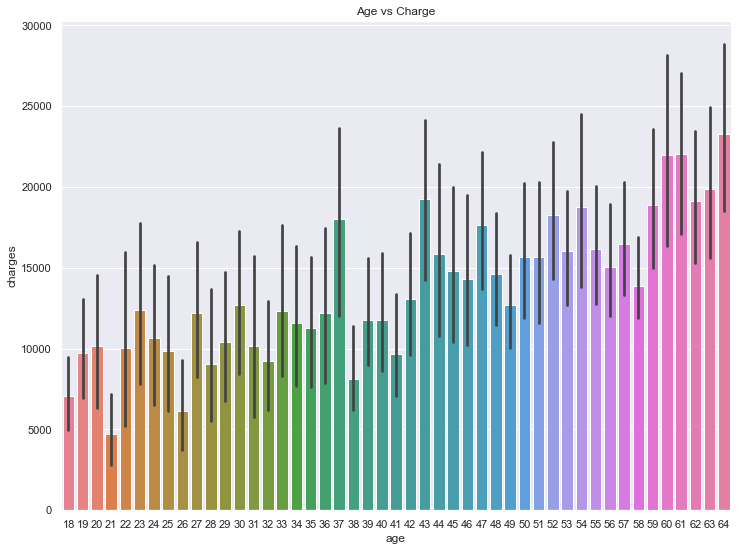

In [14]:
# Age vs Charges

plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data,palette='husl')

<AxesSubplot:title={'center':'Region vs Charge'}, xlabel='region', ylabel='charges'>

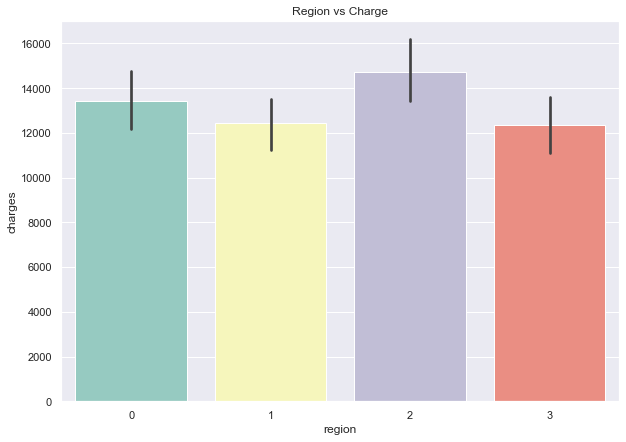

In [15]:
# Region vs Charges

plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

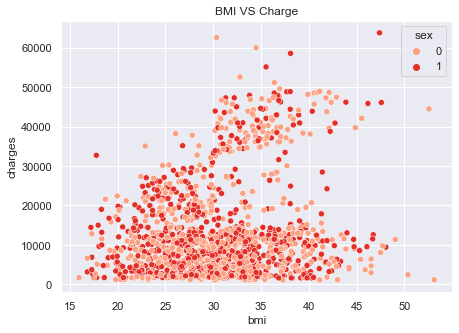

In [16]:
# BMI vs Charges

plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data,palette='Reds')
plt.title('BMI VS Charge')

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

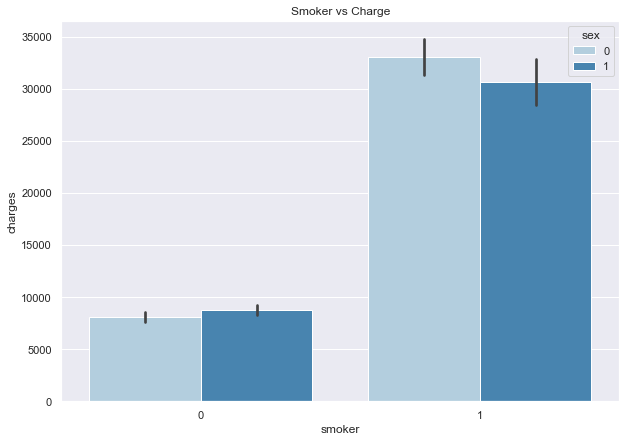

In [17]:
# Smoker vs Charges

plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data,palette='Blues',hue='sex')

<AxesSubplot:title={'center':'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

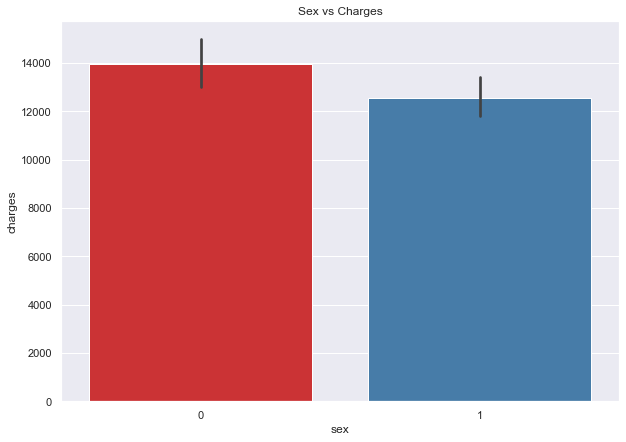

In [18]:
# Sex vs Charges

plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data,palette='Set1')

## Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

data_pred=data.copy()

tempBmi=data_pred.bmi
tempBmi=tempBmi.values.reshape(-1,1)
data_pred['bmi']=StandardScaler().fit_transform(tempBmi)

tempAge=data_pred.age
tempAge=tempAge.values.reshape(-1,1)
data_pred['age']=StandardScaler().fit_transform(tempAge)

tempCharges=data_pred.charges
tempCharges=tempCharges.values.reshape(-1,1)
data_pred['charges']=StandardScaler().fit_transform(tempCharges)

data_pred.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,1,0.719843
4,-0.513149,0,-0.292556,0,0,1,-0.776802


## Model Training

### Importing Libraries

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

### Splitting Features and Target

In [21]:
X=data_pred.drop('charges',axis=1).values
y=data_pred['charges'].values.reshape(-1,1)

### Splitting Data into Training data and Testing data

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
print('Training data', X_train.shape,
      '\nTraining Target', y_train.shape,
      '\n\nTesting data', X_test.shape,
      '\nTesting Target', y_test.shape)

Training data (1070, 6) 
Training Target (1070, 1) 

Testing data (268, 6) 
Testing Target (268, 1)


## Linear Regression

In [24]:
linear_reg=LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
cv_linear_reg=cross_val_score(estimator=linear_reg, X = X, y = y, cv = 10)

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))

CV Linear Regression : 0.745


 Prediction on Training Data

In [26]:
y_pred_linear_reg_train=linear_reg.predict(X_train)
r2_score_linear_reg_train=r2_score(y_train, y_pred_linear_reg_train)


print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))

R2_score (train) : 0.742


 Prediction on Testing Data

In [27]:
y_pred_linear_reg_test=linear_reg.predict(X_test)
r2_score_linear_reg_test=r2_score(y_test, y_pred_linear_reg_test)

print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))

R2_score (test) : 0.783


In [28]:
rmse_linear=(np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('RMSE : {0:.3f}'.format(rmse_linear))

RMSE : 0.479


## Random Forest Regression

In [29]:
X_c=data.drop('charges',axis=1).values
y_c=data['charges'].values.reshape(-1,1)

X_train_c,X_test_c,y_train_c,y_test_c=train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled=StandardScaler().fit_transform(X_train_c)
y_train_scaled=StandardScaler().fit_transform(y_train_c)
X_test_scaled=StandardScaler().fit_transform(X_test_c)
y_test_scaled=StandardScaler().fit_transform(y_test_c)

In [30]:
%%time
reg_rf=RandomForestRegressor()
parameters={ 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60], 
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train_scaled, y_train_scaled.ravel())

Wall time: 12min 57s


In [31]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_

(0.8489464060583574,
 RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=9,
                       n_estimators=600))

In [32]:
rf_reg=RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [33]:
cv_rf=reg_rf_gscv.best_score_

y_pred_rf_train=rf_reg.predict(X_train_scaled)
r2_score_rf_train=r2_score(y_train, y_pred_rf_train)

y_pred_rf_test=rf_reg.predict(X_test_scaled)
r2_score_rf_test=r2_score(y_test_scaled, y_pred_rf_test)

rmse_rf=np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.849
R2 score (train) : 0.885
R2 score (test) : 0.880
RMSE : 0.347


### Comparing Models

In [34]:
models=[('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [35]:
predict=pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])

predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.479088,0.741705,0.783346,0.744805
1,Random Forest Regression,0.346566,0.884696,0.879892,0.848946


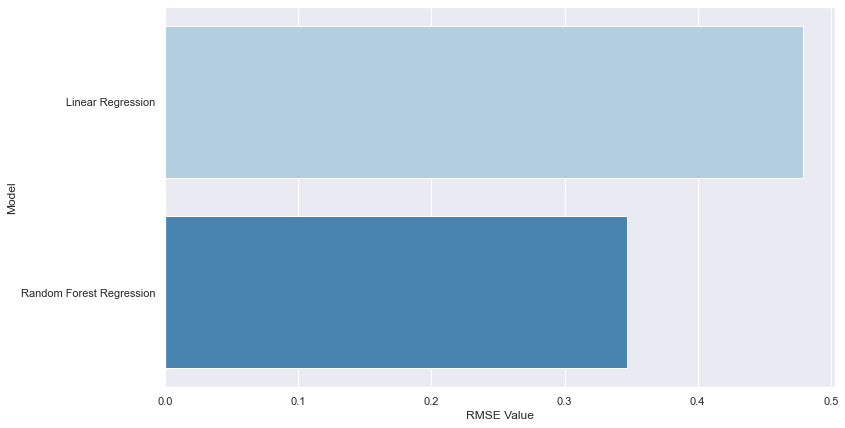

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(x='RMSE', y='Model',data=predict, palette='Blues')
plt.xlabel('RMSE Value')
plt.ylabel('Model')
plt.show()

## Best Model : Random Forest Regression

Since the rmse value of it is lesser than the linear regression

In [37]:
# Training Data without Scaling for RandomClassifier

data.head()

X_s=data.drop('charges',axis=1).values
y_s=data['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X_s,y_s,test_size=0.2, random_state=42)

In [38]:
regressor=RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
regressor.fit(X_train_s,y_train_s.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [39]:
y_pred_rf_train_s=regressor.predict(X_train_s)
r2_score_rf_train_s=r2_score(y_train_s, y_pred_rf_train_s)

y_pred_rf_test_s=regressor.predict(X_test_s)
r2_score_rf_test_s=r2_score(y_test_s, y_pred_rf_test_s)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_s))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_s))

R2 score (train) : 0.885
R2 score (test) : 0.878


In [40]:
pred=regressor.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

print('{0:.3f}'.format(pred))

19014.683


## Saving the Model

In [41]:
import pickle

Pkl_Filename="rf_reg.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)

In [42]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    rf_tuned_loaded=pickle.load(file)

In [43]:
rf_tuned_loaded

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [44]:
pred=rf_tuned_loaded.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

print('{0:.3f}'.format(pred))

19014.683
